#### **Dataset Details**

| Feature                  | Explanation                                         | Measurement     | Range             |
|--------------------------|-----------------------------------------------------|-----------------|-------------------|
| Age                      | Age of the patient                                  | Years           | [40,..., 95]      |
| Anaemia                  | Decrease of red blood cells or hemoglobin           | Boolean         | 0, 1              |
| High blood pressure      | If a patient has hypertension                       | Boolean         | 0, 1              |
| Creatinine phosphokinase (CPK) | Level of the CPK enzyme in the blood           | mcg/L           | [23,..., 7861]    |
| Diabetes                 | If the patient has diabetes                         | Boolean         | 0, 1              |
| Ejection fraction        | Percentage of blood leaving the heart at each contraction | Percentage  | [14,..., 80]      |
| Sex                      | Woman or man                                        | Binary          | 0, 1              |
| Platelets                | Platelets in the blood                              | kiloplatelets/mL | [25.01,..., 850.00]|
| Serum creatinine         | Level of creatinine in the blood                    | mg/dL           | [0.50,..., 9.40]  |
| Serum sodium             | Level of sodium in the blood                        | mEq/L           | [114,..., 148]    |
| Smoking                  | If the patient smokes                               | Boolean         | 0, 1              |
| Time                     | Follow-up period                                    | Days            | [4,..., 285]      |
| (target) death event     | If the patient died during the follow-up period     | Boolean         | 0, 1              |


#### **Importing the Libraries**

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### **1. Load the Dataset**

In [7]:
df = pd.read_csv('C:/Users/vishv/OneDrive/Documents/AIML_2/Project/data-collection/Heart_failure/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### **2. Exploratory Data Analysis**

In [4]:
# Display info about the dataframe such as column non-null count and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Data Distribution of each Feature**

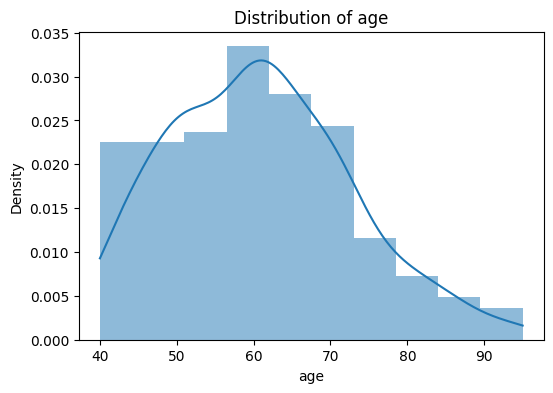

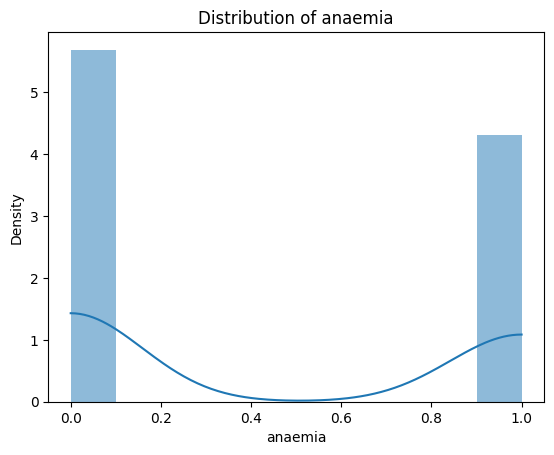

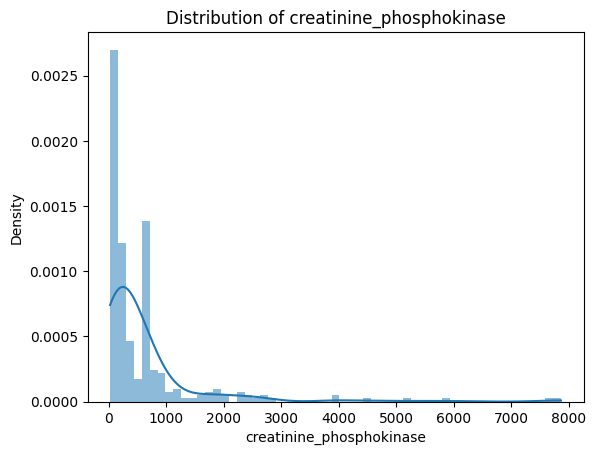

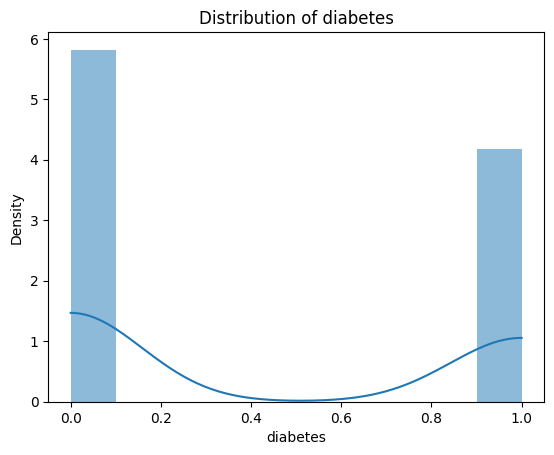

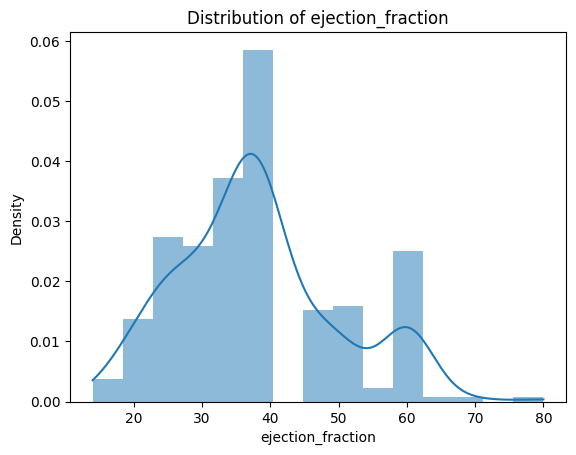

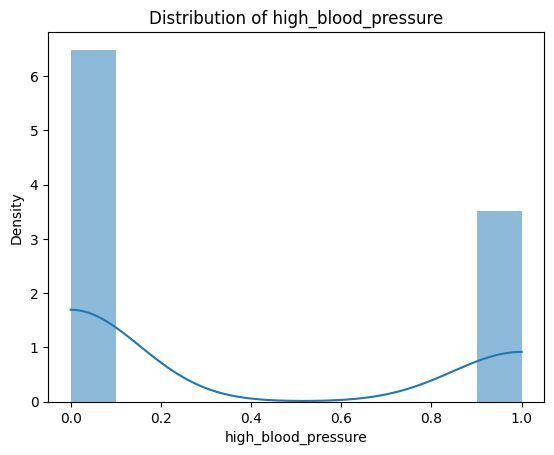

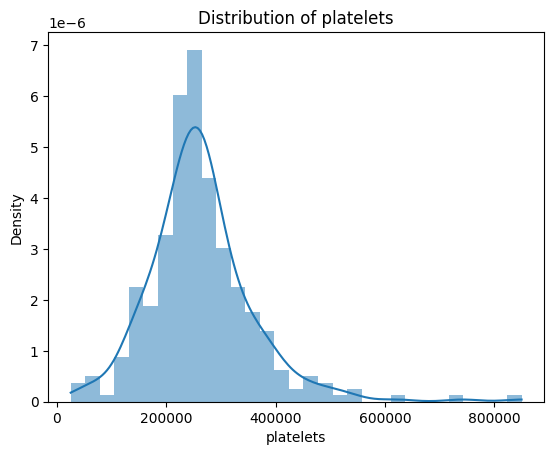

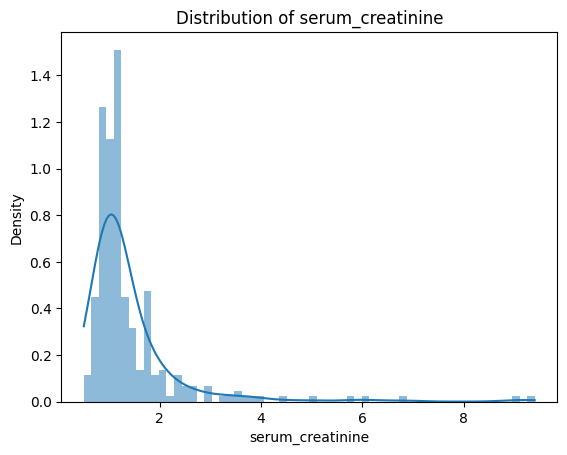

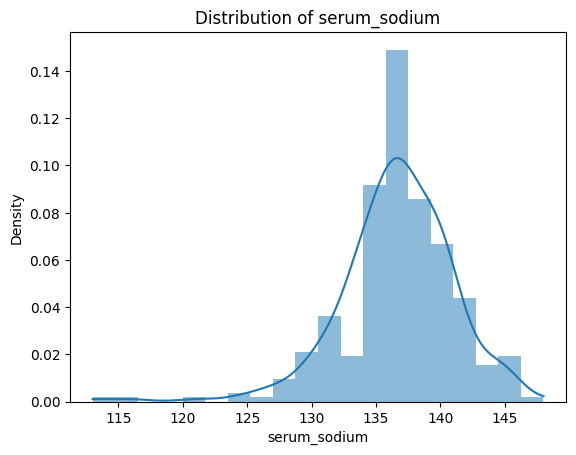

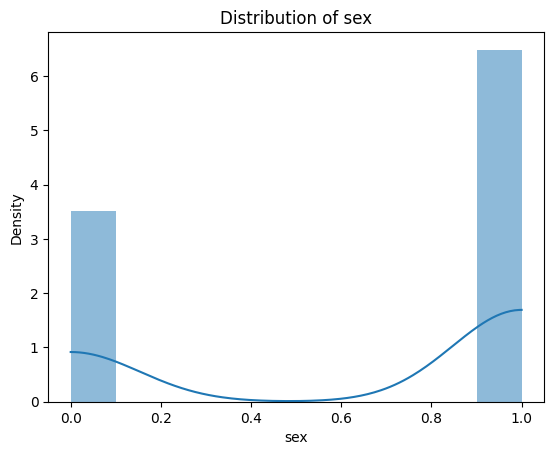

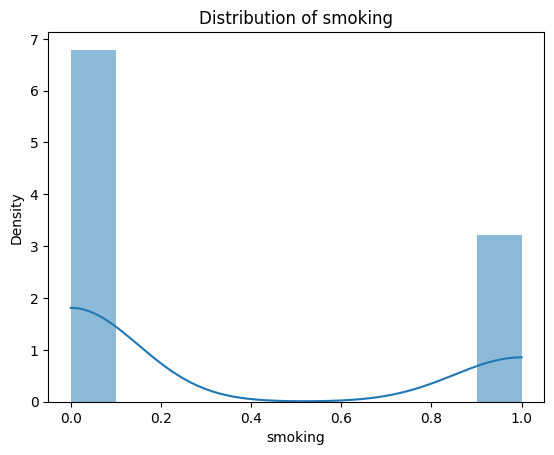

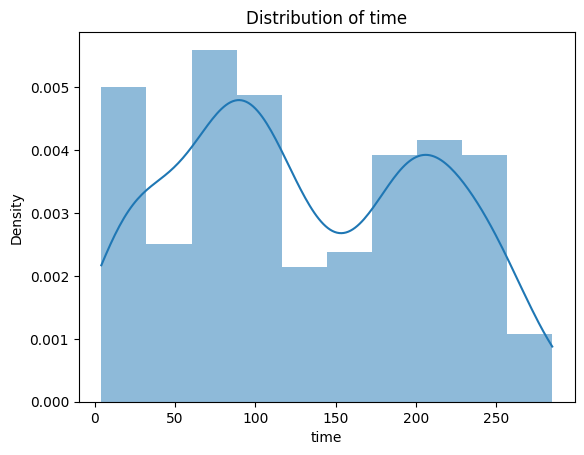

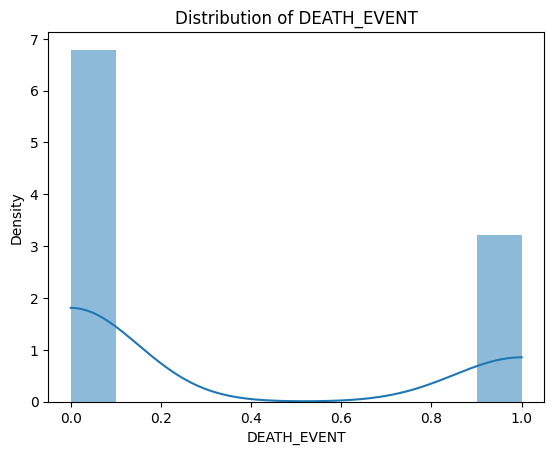

In [7]:
# Plot normal distribution for each numerical column
plt.figure(figsize=(6, 4))
for column in df.select_dtypes(include=['float64', 'int64']):
    sns.histplot(df[column], kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

**Pair Plot of Death Event with Each Feature**

*************************age***************************


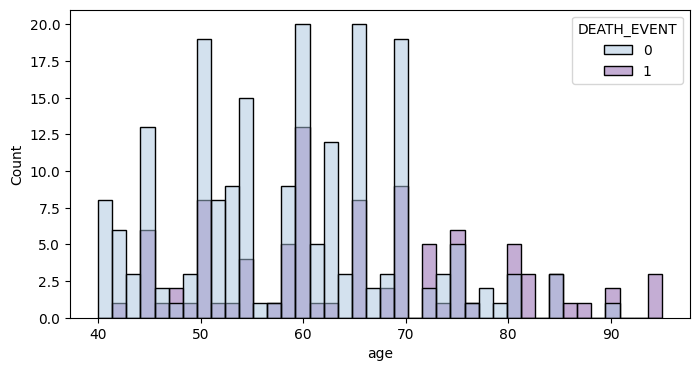

*************************anaemia***************************


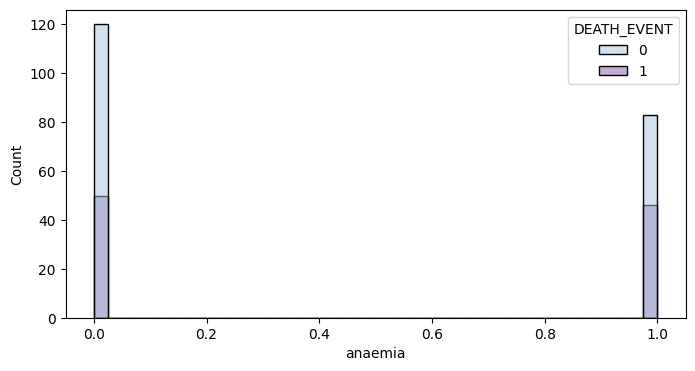

*************************creatinine_phosphokinase***************************


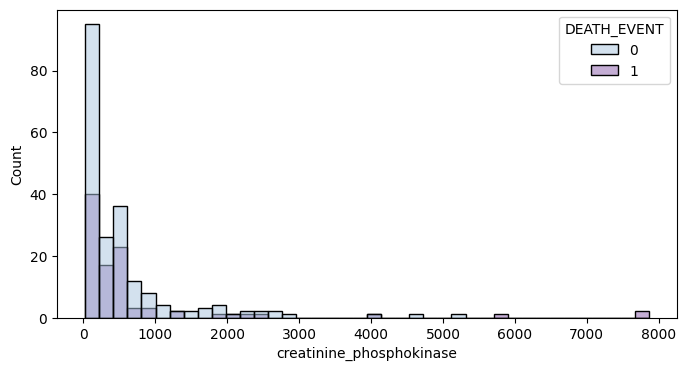

*************************diabetes***************************


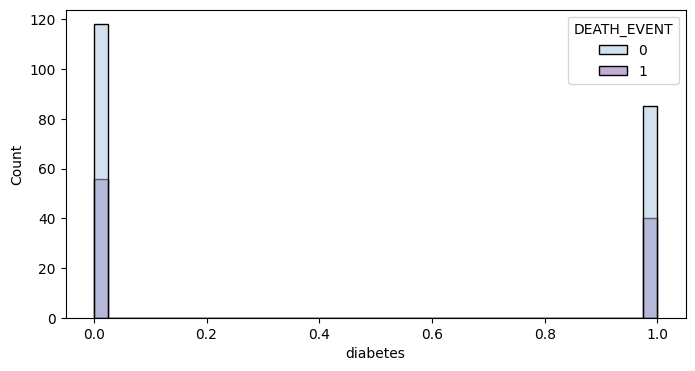

*************************ejection_fraction***************************


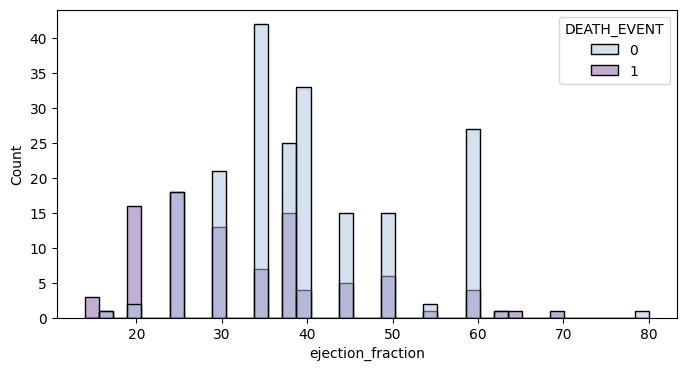

*************************high_blood_pressure***************************


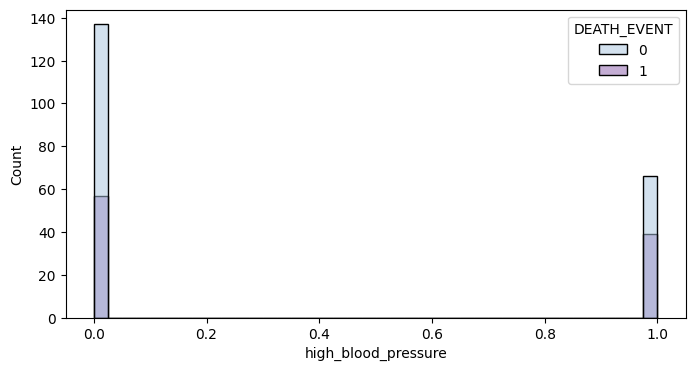

*************************platelets***************************


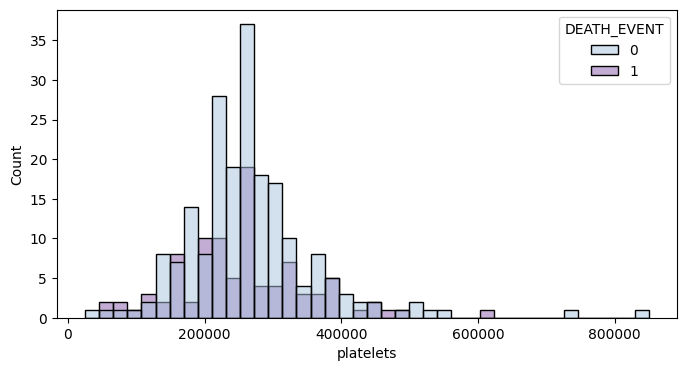

*************************serum_creatinine***************************


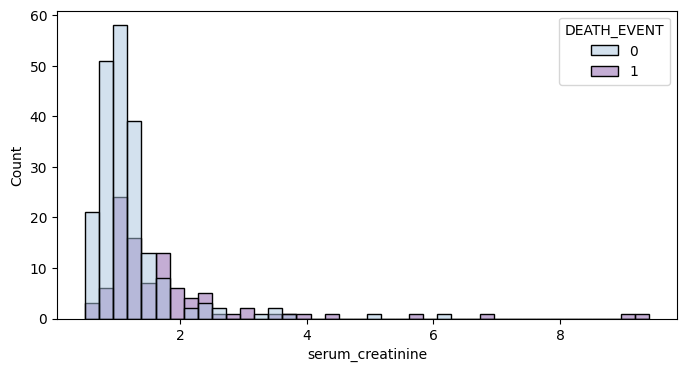

*************************serum_sodium***************************


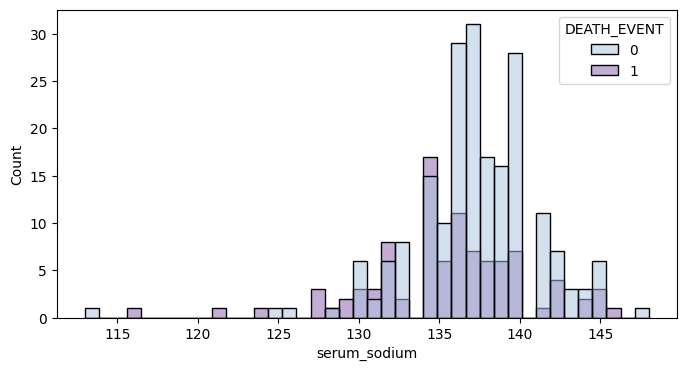

*************************sex***************************


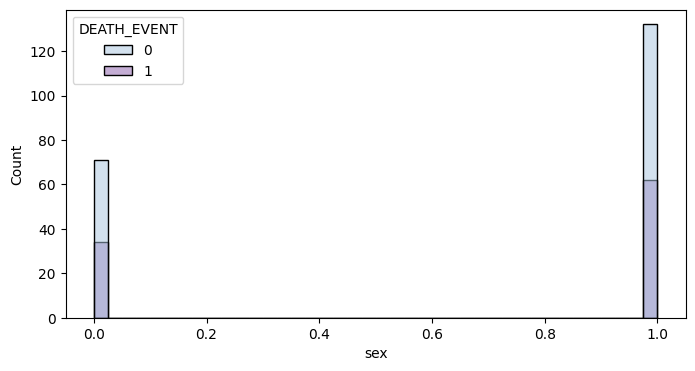

*************************smoking***************************


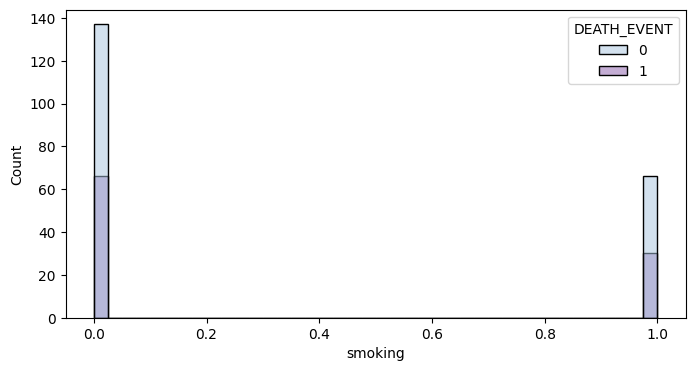

*************************time***************************


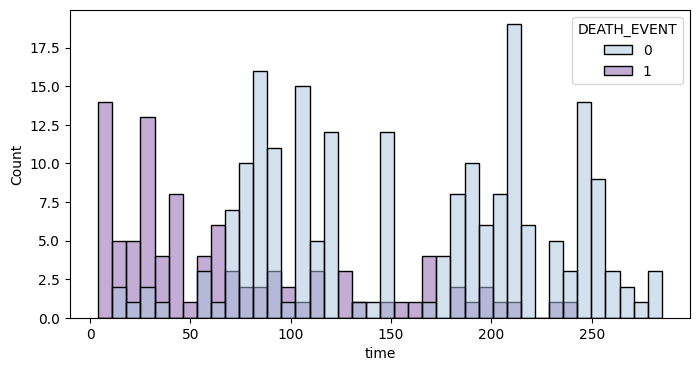

In [8]:
col=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
for i in col :
    plt.figure(figsize=(8,4))
    sns.histplot(df, x=i, hue="DEATH_EVENT",bins=40,palette="BuPu")
    print(f"*************************{i}***************************")
    plt.show()

**The Percentage of Death Event**

In [9]:
target_count = df['DEATH_EVENT'].value_counts()
target_unique = df['DEATH_EVENT'].unique()
fig = px.pie (values = target_count , names = target_unique ,  title = 'percent of each DEATH_EVENT ')
fig.show()

**Correlation Matrix**

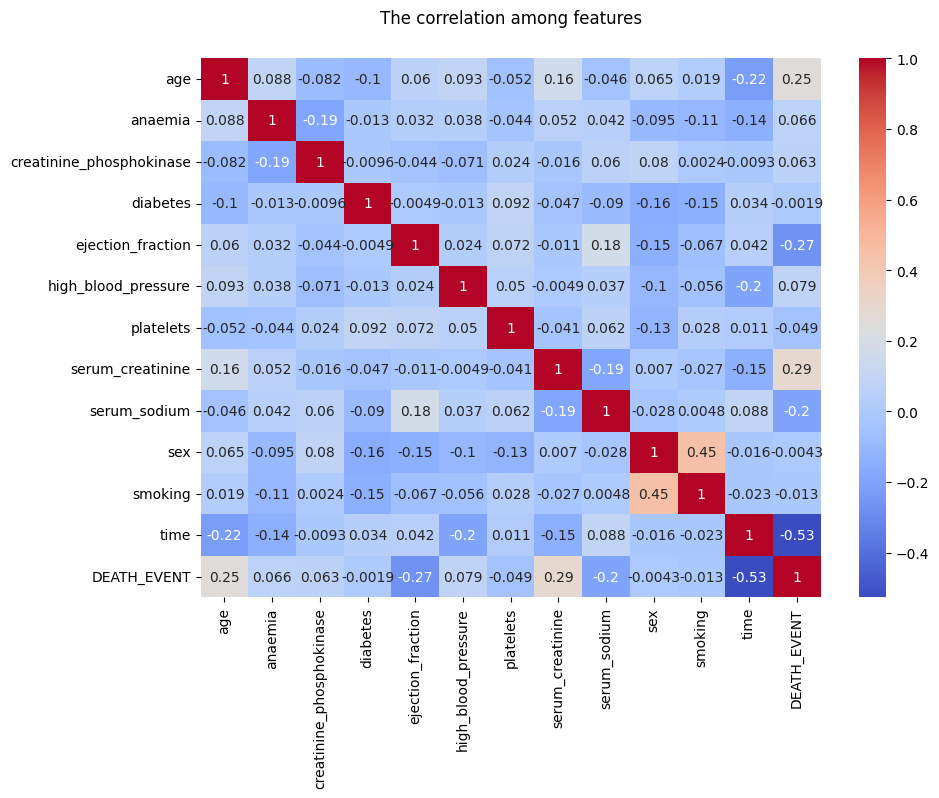

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

* Death Event: Strongest correlations are with time (-0.53), serum creatinine (0.29), and age (0.25). Weakest correlations are with diabetes (-0.0019), sex (-0.0043), and smoking (-0.013).
* Anaemia: Strongest correlations are weak, with creatinine phosphokinase (-0.19), time (-0.14), and smoking (-0.11). Weakest correlations are with diabetes (-0.013), ejection fraction (0.032), and high blood pressure (0.038).

In [5]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## **Heart Failure Prediction**

#### **3. Data Preprocessing**

In [11]:
X = df.drop(['DEATH_EVENT'] , axis =1)
y = df['DEATH_EVENT']

**Scaling the Data**

In [12]:
# scale the data 
h_scaler = StandardScaler()
X_scaled = h_scaler.fit_transform(X)

* Standard Scaler scales the data by subtracting the mean and dividing by the standard deviation for each feature, resulting in a new dataset X_scaled where each feature has a mean of 0 and a standard deviation of 1.

**Save the Scaler**

In [13]:
# Saving the scaler
import pickle

# Save the scaler to a file
scaler_filename = 'scaler_h.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(h_scaler, file)

#### **4. Split the Data**

In [14]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_scaled_train shape is ' , X_scaled_train.shape)
print('X_scaled_test shape is ' , X_scaled_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_scaled_train shape is  (224, 12)
X_scaled_test shape is  (75, 12)
y_train shape is  (224,)
y_test shape is  (75,)


#### **5. Model Building**

##### **5.1 Random Forest Classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

DF_evaluvation = pd.DataFrame ()

estimator_list = range(10, 51,5) 
max_depth_list = range (2,16)
criterion_list = ['gini','entropy']

for s in estimator_list:
        
    for m in max_depth_list:
        
        for c in criterion_list:
            
            Rf_model = RandomForestClassifier(n_estimators= s, max_depth= m, criterion= c , random_state=0 , n_jobs=-1)
            Rf_model.fit(X_scaled_train, y_train.ravel())
            y_pred = Rf_model.predict(X_scaled_test)
            
            dict = { "n_estimator": s, "criterion": c, "max_depth": m,
                     "score": Rf_model.score(X_scaled, y),"acc": metrics.accuracy_score(y_test, y_pred),
                    'score test':Rf_model.score(X_scaled_test,y_test)}

            df_entry = pd.DataFrame([dict])  # Convert dictionary to DataFrame
            DF_evaluvation = pd.concat([DF_evaluvation, df_entry], ignore_index=True)  # Concatenate DataFrames

* Here, in above code we perform hyperparameter tuning for a RandomForestClassifier by systematically evaluating its performance with different combinations of hyperparameters (n_estimators, max_depth, and criterion). This helps us in finding the best set of hyperparameters that result in the best model performance.

In [16]:
def highlight_max(s):
    
    is_max = s == s.max()
    return['background-color: blue' if v else '' for v in is_max]

DF_evaluvation.style.apply(highlight_max)

,n_estimator,criterion,max_depth,score,acc,score test
0,10,gini,2,0.789298,0.680000,0.680000
1,10,entropy,2,0.795987,0.693333,0.693333
2,10,gini,3,0.872910,0.800000,0.800000
3,10,entropy,3,0.872910,0.800000,0.800000
4,10,gini,4,0.869565,0.720000,0.720000
5,10,entropy,4,0.866221,0.733333,0.733333
6,10,gini,5,0.889632,0.760000,0.760000
7,10,entropy,5,0.889632,0.733333,0.733333
8,10,gini,6,0.896321,0.706667,0.706667
9,10,entropy,6,0.896321,0.733333,0.733333


* Now, we select the parameters `(n_estimators= 10, max_depth= 8, criterion= 'gini')`, which give us the best accuracy on the test set.

**Fit the Best Model**

In [17]:
best_RF_model = RandomForestClassifier(n_estimators= 10, max_depth= 8, criterion= 'gini', random_state=0)
best_RF_model.fit(X_scaled_train, y_train.ravel())

RandomForestClassifier(max_depth=8, n_estimators=10, random_state=0)

**Evaluation of The Model**

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_rf = best_RF_model.predict(X_scaled_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Generate the classification report
class_report = classification_report(y_test, y_pred_rf)

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)


Accuracy: 0.8133333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        47
           1       0.77      0.71      0.74        28

    accuracy                           0.81        75
   macro avg       0.80      0.79      0.80        75
weighted avg       0.81      0.81      0.81        75



* The model achieved an accuracy of 81.33%, meaning it correctly predicted the class of approximately 81% of the instances.
* The precision for class 0 is 84%, indicating that 84% of the instances predicted as class 0 were correct. The recall for class 0 is 87%, showing that 87% of the actual class 0 instances were correctly identified. The F1-score for class 0 is 0.85, reflecting a balanced precision and recall.
* For class 1, the precision is 77%, meaning 77% of the instances predicted as class 1 were correct. The recall for class 1 is 71%, indicating that 71% of the actual class 1 instances were correctly identified. The F1-score for class 1 is 0.74.

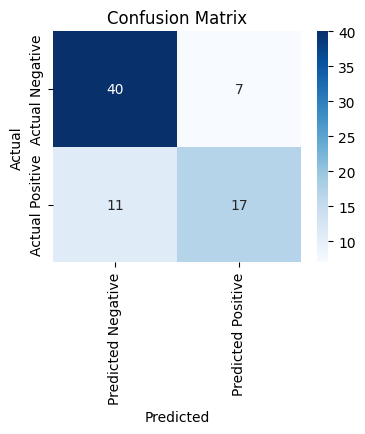

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


* The confusion matrix reveals that out of 47 actual instances of class 0, 41 were correctly predicted, and 6 were misclassified. For class 1, out of 28 actual instances, 20 were correctly predicted, and 8 were misclassified.

##### **5.2 Logistic Regression Model**

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_reg_model = LogisticRegression(random_state=0)
log_reg_model.fit(X_scaled_train, y_train)


LogisticRegression(random_state=0)

**Evaluation of the Model**

In [21]:
# Make predictions
y_pred_log_reg = log_reg_model.predict(X_scaled_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Print the results
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print('Classification Report:')
print(class_report_log_reg)

Logistic Regression Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        47
           1       0.74      0.71      0.73        28

    accuracy                           0.80        75
   macro avg       0.79      0.78      0.78        75
weighted avg       0.80      0.80      0.80        75



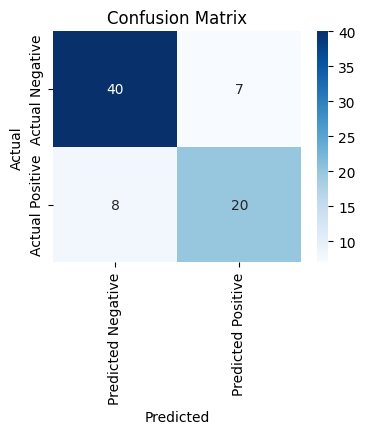

In [22]:
# Generate the confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### **5.3 K-Nearest Neighbour**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_scaled_train, y_train)

KNeighborsClassifier()

**Evaluation of the Model**

In [24]:
# Make predictions
y_pred_knn = knn_model.predict(X_scaled_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print the results
print(f'KNN Accuracy: {accuracy_knn}')
print('Classification Report:')
print(class_report_knn)

KNN Accuracy: 0.6266666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        47
           1       0.50      0.14      0.22        28

    accuracy                           0.63        75
   macro avg       0.57      0.53      0.49        75
weighted avg       0.59      0.63      0.56        75



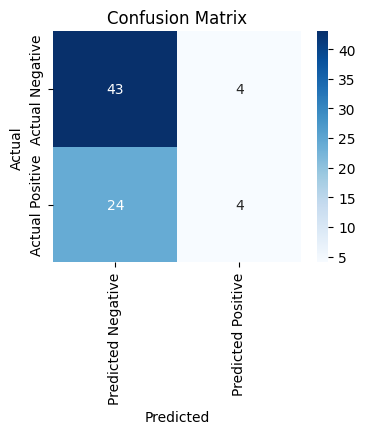

In [25]:
# Generate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* Here, we saved the random forest model for making prediction about heart failure as it has high accuracy`(81.33%)` as compared to other to models